In [3]:
%cd C:\Users\yukir\Documents\GitHub\Scrapper\py

from nlp_processing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine

C:\Users\yukir\Documents\GitHub\Scrapper\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11769498189339555019
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12712331650331177206
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5731559277268434107
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4526849997614082363
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Korea_medicine


In [4]:
final_review = pd.read_csv("C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\final_reviews.csv", index_col = 0)
final_review.head(2)

,hospital,stars,reviews,adress
0,청주나비솔한의원,10.0,병원이 전반적으로 깔끔해서 쾌적했어요대기가 좀 있지만 심하진 않은편이었고 간호사분들...,충북
1,청주나비솔한의원,7.5,체인 한의원이라서 망설였는데 시설도 깔끔하고 진료도 친절하게 너무 잘 봐주셨어요 그...,충북


In [5]:
df = final_review.copy()
print(df.shape)

(14989, 4)


In [6]:
df = df.dropna(axis=0)
print(df.shape)

(14988, 4)


{'whiskers': [<matplotlib.lines.Line2D at 0x246e09a8520>,
 'caps': [<matplotlib.lines.Line2D at 0x246e09a8b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x246e09a80d0>],
 'medians': [<matplotlib.lines.Line2D at 0x246e09b62e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x246e09b6670>],
 'means': []}

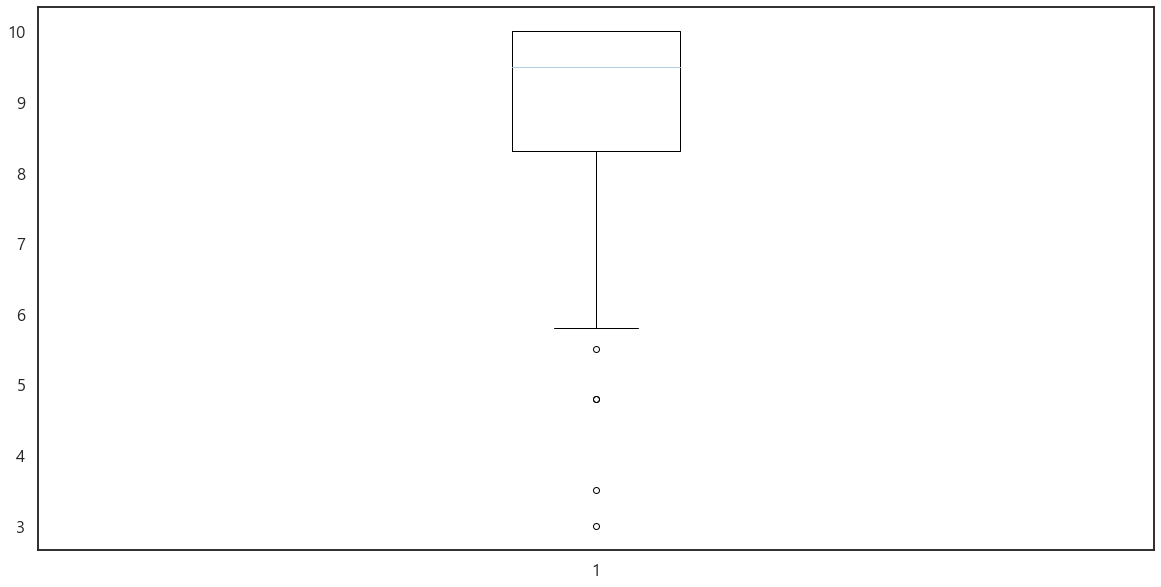

In [7]:
region= df[df['adress'] == '경남']
plt.boxplot(region.stars)

In [8]:
df_more6 = region[region['stars'] > 8.2]
print(df_more6.shape)
df_more6.head()

(324, 4)


,hospital,stars,reviews,adress
9,진주경희한의원,10.0,허리가 갑자기 좋지않아져서 급하게 다녀왔습니다 집과 가까운곳이고 직장인이라서 저녁 ...,경남
10,진주경희한의원,10.0,난생처음 한의원에 방문해봐요집근처에 처음 오픈한 한의원이라 청결하고 병원내부도 깔끔...,경남
11,진주경희한의원,8.5,허리가 아파서 병원을 찾던 중 아는 지인이 추천해줘서 가봤어요 접수하시는 분이 너...,경남
12,진주경희한의원,10.0,염좌 치료를 받았습니다 선생님께서 굉장히 친절하셨어요 의사선생님께 증상에 대해서 설...,경남
13,진주경희한의원,9.5,제 지인들이 추천해줘서 갔던 병원인데 너무 친절하셔서 좋았어요 제가 때를 잘 잡은 ...,경남


In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
def make_noun(x):
    x = okt.nouns(x)
    return x

In [11]:
df_more6['reviews'] = df_more6['reviews'].apply(make_noun)
for_network = df_more6.copy()
df_more6['reviews'].head()

C:\Users\yukir\AppData\Local\Temp/ipykernel_23036/3817455113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews'] = df_more6['reviews'].apply(make_noun)


9     [허리, 갑자기, 집, 곳, 직장인, 저녁, 시간, 도, 야간, 진료, 원장, 이하...
10    [난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호...
11    [허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침...
12    [염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치...
13    [제, 지인, 추천, 병원, 제, 때, 다른, 병원, 달리, 대기, 시간, 별로, ...
Name: reviews, dtype: object

In [12]:
# 여기서부터 조심해서 네트워크 해보기
df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]
df_more6['reviews'].head() 

C:\Users\yukir\AppData\Local\Temp/ipykernel_23036/853035387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_more6['reviews']  = [" ".join(review) for review in df_more6['reviews'].values]


9          허리 갑자기 집 곳 직장인 저녁 시간 도 야간 진료 원장 이하 간호사 자주 이용
10    난생처음 한의원 방문 집 근처 처음 오픈 한의원 병원 부도 간호사 서도 응대 원장 ...
11      허리 병원 중 지인 추천 접수 분 원장 것 것 주시 진료 침 아주 것 완전 전문 느낌
12    염좌 치료 선생님 의사 선생님 증상 대해 설명 때 긴장 편 치료 여러가지 방법 시도...
13    제 지인 추천 병원 제 때 다른 병원 달리 대기 시간 별로 지인 추천 만 병원 다음...
Name: reviews, dtype: object

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋습니다. 
                             ngram_range=(1, 6), # BOW의 단위 갯수의 범위를 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수
                            )
vectorizer

TfidfVectorizer(max_features=2000, min_df=2, ngram_range=(1, 6))

In [14]:
# df['covid'] 만 벡터화 합니다.
feature_vector = vectorizer.fit_transform(df_more6['reviews'])
feature_vector.shape

(324, 1038)

In [15]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1038


['가게', '가격', '가격 부담', '가기', '가까이', '가까이 치료', '가끔', '가능', '가도', '가라']

In [16]:
pd.DataFrame(feature_vector[:].toarray(), columns=vocab).head()

,가게,가격,가격 부담,가기,가까이,가까이 치료,가끔,가능,가도,가라,가면,가성,가요,가정,가지,간다,간호,간호 선생님,간호사,간호사 기분,간호사 모두,간호사 병원,간호사 선생님,간호사 시간,간호사 친절,간호조무사,갈수,갈수록,감기,감기 몸살,감사,갑자기,강요,강추,개선,개원,개인,거나,거리,거북목,거의,걱정,건물,건물 병원,건물 지하,건물 지하 주차장,검사,검색,결과,결과 대해,...,한지 얼마,할머니,할머니 할아버지,할아버지,합리,항상,해주시,해주시 원장,해주시 치료,허리,허리 디스크,허리 방문,허리 신분,허리 어깨,허리 어깨 치료,허리 통증,허리 통증 방문,허리 통증 심해,허리 한의원,허리 허리,현재,혈압,호전,혹시,화장실,확인,환경,환자,환자 대기,환자 대기 시간,환자 시간,환자 진료,회복,회사,회사 근처,회산,회산 다리,효과,효과 물리치료,효과 병원,효과 시간,효과 직원,효과 처방,효과 치료,효과 한의원,후기,후유증,휴식,휴일,힐링
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.314672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(feature_vector, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
df_freq.to_excel('df_freq.xlsx', encoding= 'utf-8')

(1, 1038)


In [18]:
# 행과 열의 축을 T로 바꿔주고 빈도수로 정렬합니다.
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
치료,20.449026
한의원,15.547686
진료,15.484296
방문,14.895514
병원,14.760258
...,...
도수 치료,2.384196
대해 설명,2.351158
하루,2.345371
체질,2.340679


In [19]:
# ["course", "freq"] 라는 컬럼명을 주어 위에서 만든 데이터프레임을 변환합니다.
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["words", "freq"]
df_freq_T.tail()
# df_freq_T.to_excel('df_freq_T.xlsx', encoding= 'utf-8')

,words,freq
1033,후기,0.268837
1034,후유증,0.465610
1035,휴식,0.503715
1036,휴일,0.480050
1037,힐링,0.669725


In [20]:
# 3개의 ngram과 빈도수로 역순 정렬을 하게 되면 빈도수가 높고, ngram수가 많은 순으로 정렬이 됨 
# 여기에서 drop_duplicates로 중복을 삭제 합니다.
print(df_freq_T.shape)
df_use = df_freq_T.drop_duplicates()
print(df_use.shape)

(1038, 2)
(1038, 2)


In [21]:
# 빈도수로 정렬을 하고 어떤 강좌가 댓글에서 가장 많이 언급되었는지 봅니다.
df_use = df_use.sort_values(by="freq", ascending=False)
df_use.head(20)

,words,freq
835,치료,20.449026
959,한의원,15.547686
753,진료,15.484296
268,방문,14.895514
299,병원,14.760258
394,선생님,13.127065
569,원장,12.128678
418,설명,11.168730
729,직원,10.260296
1025,효과,9.054338


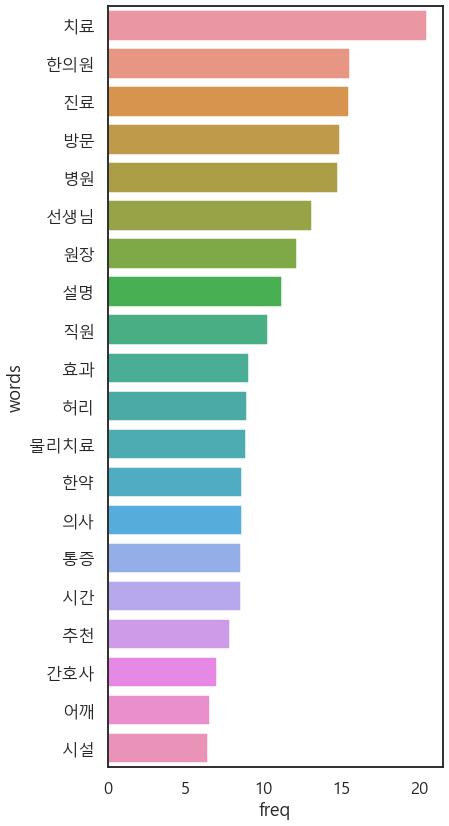

In [22]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(6,14))
ax = sns.barplot(x = 'freq', y = 'words', 
                 data = df_use.sort_values(by = 'freq', 
                                               ascending = False).head(20))
# ax.set(xlabel = 'Overall', ylabel = 'Pokemon')
# plt.savefig('covid2_frequency.png')
plt.show()


In [23]:
words_v2 = []

for num, i in enumerate (df_use.words):
  words_v2.append((i, int(df_use.freq[num])))

words_clean = words_v2.copy()

In [24]:
words_clean

[('치료', 2),
 ('한의원', 2),
 ('진료', 0),
 ('방문', 1),
 ('병원', 1),
 ('선생님', 0),
 ('원장', 1),
 ('설명', 0),
 ('직원', 0),
 ('효과', 0),
 ('허리', 1),
 ('물리치료', 0),
 ('한약', 0),
 ('의사', 0),
 ('통증', 1),
 ('시간', 0),
 ('추천', 0),
 ('간호사', 0),
 ('어깨', 6),
 ('시설', 0),
 ('정말', 0),
 ('의사 선생님', 0),
 ('대기', 2),
 ('증상', 0),
 ('환자', 0),
 ('때문', 0),
 ('대해', 0),
 ('추나', 0),
 ('조금', 1),
 ('처음', 0),
 ('상담', 0),
 ('자주', 1),
 ('지인', 0),
 ('처방', 1),
 ('생각', 2),
 ('정도', 0),
 ('예약', 0),
 ('느낌', 0),
 ('여기', 1),
 ('다이어트', 1),
 ('상태', 2),
 ('발목', 1),
 ('해주시', 2),
 ('다음', 0),
 ('주차', 0),
 ('한번', 0),
 ('동네', 2),
 ('허리 통증', 1),
 ('다른', 0),
 ('위치', 0),
 ('한의원 방문', 0),
 ('아주', 0),
 ('소개', 0),
 ('사람', 1),
 ('항상', 0),
 ('한의사', 2),
 ('친절', 0),
 ('기분', 0),
 ('모두', 0),
 ('내부', 0),
 ('기억', 0),
 ('바로', 1),
 ('관리', 1),
 ('하나', 0),
 ('손목', 0),
 ('침술', 0),
 ('근처', 0),
 ('부위', 0),
 ('다만', 0),
 ('부분', 0),
 ('어깨 통증', 0),
 ('가격', 0),
 ('편이', 1),
 ('호전', 0),
 ('계속', 3),
 ('추나 치료', 0),
 ('선생님 설명', 0),
 ('운동', 1),
 ('약도', 0),
 ('이용', 0),
 ('상세', 2)

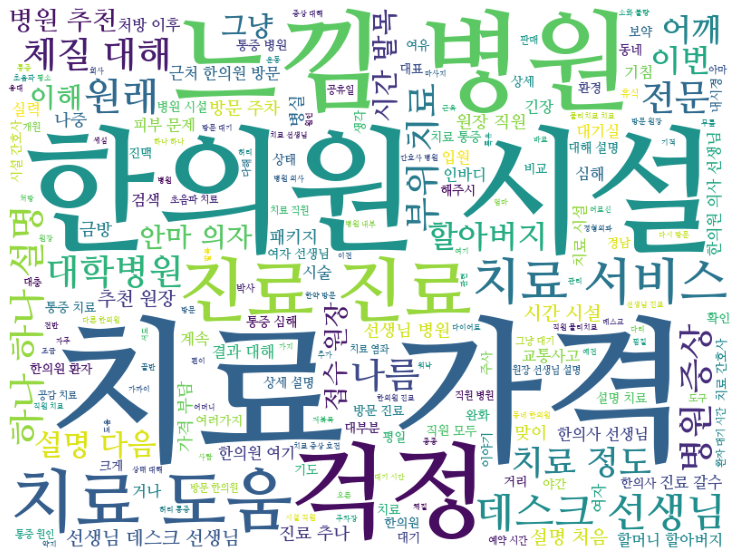

In [25]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path="C:\\Users\\yukir\\Documents\\Monicas_workspace\\Korea_medicine\\NanumMyeongjoBold.ttf",
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
for i in region.reviews:
    if '처럼' in i:
        print('-', i)

## **FOR**

In [ ]:
j = 0

del_list = []

for num, i in enumerate(words_clean):
    if '가격' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))
print(j)
print(len(del_list))       

53 ('가격', 5)
598 ('다만 가격', 4)
639 ('가격 한의원', 82)
922 ('진료 가격', 4)
95
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '불친절' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
4


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '의사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

9 ('의사', 209)
15 ('의사 선생님', 131)
58 ('한의사', 30)
81 ('방문 의사', 32)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
420 ('의사 선생님 간호사', 90)
465 ('직원 의사', 26)
509 ('진료 의사', 464)
527 ('한의원 의사', 26)
572 ('간호사 의사', 25)
615 ('치료 의사', 40)
617 ('한의원 의사 선생님', 66)
618 ('의사 간호사', 52)
624 ('진료 의사 선생님', 25)
687 ('병원 의사', 57)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
750 ('의사 설명', 26)
781 ('선생님 의사', 29)
819 ('의사 진료', 43)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
849 ('선생님 의사 선생님', 39)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
976 ('의사 선생님 정말', 30)
7675
34


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '간호사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

18 ('간호사', 943)
117 ('간호사 선생님', 33)
258 ('선생님 간호사', 36)
420 ('의사 선생님 간호사', 90)
430 ('간호사 모두', 51)
442 ('원장 간호사', 43)
572 ('간호사 의사', 25)
618 ('의사 간호사', 52)
623 ('선생님 간호사 선생님', 113)
729 ('간호사 선생님 모두', 25)
831 ('병원 간호사', 38)
855 ('간호사 원장', 50)
876 ('치료 간호사', 30)
903 ('진료 간호사', 143)
907 ('의사 선생님 간호사 선생님', 25)
919 ('설명 간호사', 34)
928 ('데스크 간호사', 27)
1758
51


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '다이어트' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

50 ('다이어트', 205)
230 ('다이어트 한약', 128)
333
53


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
62


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '도수' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

89 ('도수', 61)
104 ('도수 치료', 296)
357
64


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한의원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

2 ('한의원', 25)
98 ('한의원 방문', 35)
139 ('다른 한의원', 427)
234 ('근처 한의원', 56)
257 ('동네 한의원', 300)
264 ('한의원 치료', 36)
302 ('한의원 원장', 65)
313 ('방문 한의원', 26)
338 ('한의원 진료', 39)
364 ('한의원 여기', 27)
435 ('한의원 처음', 50)
466 ('치료 한의원', 35)
472 ('한의원 추천', 32)
526 ('진료 한의원', 784)
527 ('한의원 의사', 26)
564 ('추천 한의원', 60)
617 ('한의원 의사 선생님', 66)
627 ('통증 한의원', 28)
642 ('정형외과 한의원', 127)
643 ('자주 한의원', 486)
699 ('한의원 한의원', 32)
727 ('한의원 내부', 156)
730 ('한의원 병원', 26)
759 ('주변 한의원', 38)
806 ('한의원 자주', 26)
826 ('한의원 느낌', 28)
828 ('한의원 물리치료', 38)
846 ('한의원 가장', 75)
850 ('회사 근처 한의원', 29)
865 ('한의원 검색', 42)
867 ('한의원 선생님', 30)
874 ('한의원 정말', 70)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
888 ('한의원 허리', 47)
890 ('한의원 가게', 33)
892 ('여기 한의원', 38)
974 ('전문 한의원', 43)
986 ('일반 한의원', 34)
3721
103


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '물리치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

12 ('물리치료', 43)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
444 ('진료 물리치료', 30)
535 ('찜질 물리치료', 125)
600 ('물리치료 부항', 33)
630 ('물리치료사', 27)
712 ('물리치료 부황', 24)
735 ('물리치료 찜질', 31)
744 ('설명 물리치료', 41)
751 ('방문 물리치료', 35)
828 ('한의원 물리치료', 38)
924 ('물리치료 선생님', 48)
935 ('물리치료 해주시', 33)
954 ('물리치료 시간', 48)
617
118


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '병원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

5 ('병원', 37)
158 ('병원 내부', 49)
242 ('병원 시설', 40)
277 ('병원 방문', 77)
314 ('방문 병원', 176)
328 ('다른 병원', 253)
358 ('병원 직원', 51)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
415 ('치료 병원', 64)
470 ('직원 병원', 367)
530 ('병원 치료', 68)
534 ('추천 병원', 92)
555 ('병원 원장', 205)
585 ('병원 자체', 61)
628 ('설명 병원', 26)
657 ('병원 분위기', 39)
687 ('병원 의사', 57)
689 ('시간 병원', 118)
730 ('한의원 병원', 26)
823 ('병원 병원', 40)
831 ('병원 간호사', 38)
875 ('동네 병원', 28)
895 ('병원 의사 선생님', 49)
898 ('자생 병원', 57)
960 ('근처 병원', 388)
972 ('선생님 병원', 43)
984 ('병원 위치', 44)
985 ('병원 생각', 698)
3251
147


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '시간' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

8 ('시간', 30)
62 ('대기 시간', 61)
199 ('점심시간', 267)
225 ('진료 시간', 60)
307 ('치료 시간', 138)
320 ('시간 진료', 435)
381 ('예약 시간', 36)
440 ('시간 조금', 38)
508 ('시간 거의', 26)
511 ('시간 시간', 27)
517 ('시간 치료', 41)
573 ('시간 정도', 44)
613 ('방문 시간', 49)
614 ('시간대', 114)
620 ('시간 예약', 106)
668 ('사람 시간', 74)
689 ('시간 병원', 118)
706 ('시간 바로', 168)
715 ('환자 시간', 24)
773 ('시간 대기', 314)
822 ('시간 원장', 55)
829 ('시간 직원', 33)
940 ('직원 시간', 39)
954 ('물리치료 시간', 48)
2345
171


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '예약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

21 ('예약', 33)
381 ('예약 시간', 36)
405 ('예약 방문', 29)
506 ('예약 대기', 32)
620 ('시간 예약', 106)
669 ('방문 예약', 106)
793 ('예약 진료', 45)
814 ('전화 예약', 155)
832 ('예약 예약', 35)
841 ('진료 예약', 32)
880 ('미리 예약', 119)
923 ('예약 가면', 25)
937 ('예약 필수', 71)
824
184


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '주사' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

189 ('주사', 156)
156
185


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '증상' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

36 ('증상', 117)
337 ('증상 대해', 71)
634 ('선생님 증상', 44)
778 ('증상 호전', 335)
827 ('진료 증상', 69)
912 ('치료 증상', 35)
993 ('증상 대해 설명', 31)
998 ('증상 치료', 78)
780
193


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '직원' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

10 ('직원', 33)
152 ('직원 모두', 34)
227 ('데스크 직원', 29)
289 ('원장 직원', 29)
350 ('직원 원장', 71)
358 ('병원 직원', 51)
422 ('선생님 직원', 37)
458 ('직원 매우', 54)
465 ('직원 의사', 26)
470 ('직원 병원', 367)
638 ('치료 직원', 32)
674 ('시설 직원', 105)
701 ('진료 직원', 165)
726 ('의사 선생님 직원', 56)
743 ('방문 직원', 76)
779 ('직원 친절', 47)
821 ('직원 의사 선생님', 28)
829 ('시간 직원', 33)
840 ('내부 직원', 36)
940 ('직원 시간', 39)
941 ('직원 진료', 30)
955 ('직원 선생님', 25)
970 ('설명 직원', 60)
982 ('원장 직원 모두', 54)
1517
217


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '진료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

1 ('진료', 528)
96 ('원장 진료', 140)
106 ('선생님 진료', 32)
172 ('과잉 진료', 94)
183 ('야간 진료', 102)
194 ('진료 치료', 35)
225 ('진료 시간', 60)
255 ('바로 진료', 102)
282 ('방문 진료', 35)
294 ('진료 진료', 25)
320 ('시간 진료', 435)
333 ('진료 내부', 253)
338 ('한의원 진료', 39)
356 ('진료 원장', 49)
367 ('의사 선생님 진료', 615)
383 ('설명 진료', 31)
390 ('진료 병원', 27)
394 ('병원 진료', 33)
437 ('진료 설명', 34)
444 ('진료 물리치료', 30)
504 ('치료 진료', 30)
509 ('진료 의사', 464)
526 ('진료 한의원', 784)
583 ('진료 대기', 39)
616 ('진료 보고', 86)
624 ('진료 의사 선생님', 25)
656 ('진료 방문', 30)
694 ('진료 상담', 76)
701 ('진료 직원', 165)
771 ('원장 선생님 진료', 315)
774 ('처음 진료', 141)
793 ('예약 진료', 45)
819 ('의사 진료', 43)
820 ('진료 생각', 41)
827 ('진료 증상', 69)
837 ('진료 선생님', 62)
839 ('진료 한약', 48)
841 ('진료 예약', 32)
842 ('진료 추나', 31)
844 ('정말 진료', 47)
864 ('일요일 진료', 48)
886 ('진료 퇴근', 53)
903 ('진료 간호사', 143)
941 ('직원 진료', 30)
942 ('진료 매우', 28)
943 ('진료 보시', 75)
946 ('진료 효과', 99)
969 ('세심 진료', 74)
5822
265


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '찜질' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

60 ('찜질', 100)
535 ('찜질 물리치료', 125)
705 ('찜질 치료', 32)
716 ('치료 찜질', 24)
735 ('물리치료 찜질', 31)
312
270


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처방' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

43 ('처방', 216)
345 ('한약 처방', 32)
248
272


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '처음' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

28 ('처음', 27)
323 ('처음 방문', 26)
435 ('한의원 처음', 50)
596 ('방문 처음', 75)
714 ('치료 처음', 75)
774 ('처음 진료', 141)
394
278


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '치료' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0 ('치료', 184)
12 ('물리치료', 43)
91 ('추나 치료', 25)
93 ('치료 치료', 159)
104 ('도수 치료', 296)
110 ('치료 효과', 49)
185 ('설명 치료', 115)
194 ('진료 치료', 35)
196 ('치료 물리치료', 27)
243 ('물리치료 치료', 34)
264 ('한의원 치료', 36)
286 ('치료 진행', 28)
303 ('선생님 치료', 48)
307 ('치료 시간', 138)
326 ('방문 치료', 294)
340 ('치료 원장', 281)
355 ('부항 치료', 69)
372 ('치료 결과', 151)
380 ('치료 방법', 53)
393 ('전기 치료', 26)
398 ('치료 위해', 31)
415 ('치료 병원', 64)
418 ('치료 추나', 40)
441 ('치료 방문', 30)
443 ('원장 치료', 58)
444 ('진료 물리치료', 30)
466 ('치료 한의원', 35)
501 ('상담 치료', 32)
503 ('통증 치료', 133)
504 ('치료 진료', 30)
517 ('시간 치료', 41)
521 ('치료 해주시', 74)
524 ('치료 부항', 39)
528 ('부황 치료', 50)
530 ('병원 치료', 68)
531 ('치료 설명', 29)
535 ('찜질 물리치료', 125)
557 ('치료 선생님', 58)
562 ('허리 치료', 139)
575 ('정도 치료', 218)
578 ('치료 허리', 50)
580 ('바로 치료', 87)
600 ('물리치료 부항', 33)
606 ('치료 통증', 65)
615 ('치료 의사', 40)
625 ('치료 대한', 37)
626 ('치료 과정', 67)
630 ('물리치료사', 27)
638 ('치료 직원', 32)
667 ('치료 부황', 196)
679 ('치료 병행', 824)
680 ('치료 대해', 29)
683 ('치료 다른', 36)
705 ('찜질 치료', 32)
712 ('물리

In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '원장' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

6 ('원장', 109)
85 ('원장 선생님', 62)
96 ('원장 진료', 140)
179 ('원장 설명', 25)
238 ('방문 원장', 130)
289 ('원장 직원', 29)
302 ('한의원 원장', 65)
340 ('치료 원장', 281)
350 ('직원 원장', 71)
356 ('진료 원장', 49)
359 ('원장 상담', 24)
426 ('원장 정말', 52)
438 ('여자 원장', 35)
442 ('원장 간호사', 43)
443 ('원장 치료', 58)
474 ('대표 원장', 186)
555 ('병원 원장', 205)
612 ('원장 매우', 39)
661 ('남자 원장', 91)
725 ('원장 직접', 1438)
771 ('원장 선생님 진료', 315)
772 ('원장 환자', 117)
776 ('원장 실력', 45)
792 ('효과 원장', 155)
822 ('시간 원장', 55)
855 ('간호사 원장', 50)
918 ('여기 원장', 386)
980 ('부원장', 33)
982 ('원장 직원 모두', 54)
991 ('일단 원장', 1437)
5779
308


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '선생님' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

4 ('선생님', 110)
15 ('의사 선생님', 131)
85 ('원장 선생님', 62)
106 ('선생님 진료', 32)
117 ('간호사 선생님', 33)
122 ('선생님 설명', 83)
145 ('한의사 선생님', 101)
251 ('의사 선생님 설명', 126)
258 ('선생님 간호사', 36)
292 ('선생님 모두', 30)
303 ('선생님 치료', 48)
367 ('의사 선생님 진료', 615)
368 ('방문 의사 선생님', 32)
385 ('선생님 정말', 68)
420 ('의사 선생님 간호사', 90)
422 ('선생님 직원', 37)
455 ('선생님 매우', 62)
481 ('선생님 상담', 136)
557 ('치료 선생님', 58)
568 ('여자 선생님', 223)
617 ('한의원 의사 선생님', 66)
623 ('선생님 간호사 선생님', 113)
624 ('진료 의사 선생님', 25)
634 ('선생님 증상', 44)
655 ('선생님 서도', 64)
675 ('방문 선생님', 166)
726 ('의사 선생님 직원', 56)
728 ('의사 선생님 매우', 54)
729 ('간호사 선생님 모두', 25)
771 ('원장 선생님 진료', 315)
781 ('선생님 의사', 29)
821 ('직원 의사 선생님', 28)
824 ('의사 선생님 치료', 5018)
833 ('치료 의사 선생님', 131)
837 ('진료 선생님', 62)
849 ('선생님 의사 선생님', 39)
867 ('한의원 선생님', 30)
894 ('선생님 환자', 118)
895 ('병원 의사 선생님', 49)
907 ('의사 선생님 간호사 선생님', 25)
924 ('물리치료 선생님', 48)
955 ('직원 선생님', 25)
972 ('선생님 병원', 43)
976 ('의사 선생님 정말', 30)
8716
352


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '한약' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

16 ('한약', 24)
230 ('다이어트 한약', 128)
345 ('한약 처방', 32)
523 ('한약 효과', 33)
756 ('한약 복용', 29)
800 ('치료 한약', 64)
839 ('진료 한약', 48)
971 ('한약 치료', 45)
403
360


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '침' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

115 ('침술', 98)
138 ('침대', 76)
271 ('봉침', 70)
412 ('아침', 41)
414 ('기침', 57)
860 ('침술 치료', 224)
566
366


In [ ]:
### 지우기

j =0

for num, i in enumerate(words_clean):
    if '환자' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

26 ('환자', 60)
715 ('환자 시간', 24)
772 ('원장 환자', 117)
894 ('선생님 환자', 118)
319
370


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '효과' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

11 ('효과', 79)
110 ('치료 효과', 49)
523 ('한약 효과', 33)
723 ('효과 치료', 84)
792 ('효과 원장', 155)
882 ('효과 한의원', 130)
884 ('한의원 효과', 76)
933 ('효과 보지', 30)
946 ('진료 효과', 99)
735
379


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '통증' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

13 ('통증', 126)
88 ('허리 통증', 166)
170 ('어깨 통증', 37)
220 ('통증 방문', 26)
482 ('통증 때문', 179)
503 ('통증 치료', 133)
536 ('통증 부위', 31)
566 ('허리 통증 방문', 25)
570 ('통증 완화', 31)
606 ('치료 통증', 65)
627 ('통증 한의원', 28)
644 ('손목 통증', 68)
737 ('통증 원인', 74)
803 ('어깨 통증 방문', 223)
1212
393


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '상담' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

27 ('상담', 26)
359 ('원장 상담', 24)
481 ('선생님 상담', 136)
501 ('상담 치료', 32)
694 ('진료 상담', 76)
994 ('상담 해주시', 33)
327
399


In [ ]:
j =0

for num, i in enumerate(words_clean):
    if '기분' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

69 ('기분', 277)
277
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '중심' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
400


In [ ]:
## 지울내용


j =0

for num, i in enumerate(words_clean):
    if '자기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

279 ('갑자기', 27)
27
401


In [ ]:
## 내용수정


j =0

for num, i in enumerate(words_clean):
    if '파서' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

665 ('파서', 153)
153
402


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '엄마' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

512 ('엄마', 82)
82
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '허름' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

0
403


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '기도' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

245 ('기도', 25)
25
404


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '대기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

19 ('대기', 60)
62 ('대기 시간', 61)
310 ('대기실', 40)
506 ('예약 대기', 32)
583 ('진료 대기', 39)
636 ('방문 대기', 39)
755 ('사람 대기', 117)
773 ('시간 대기', 314)
830 ('대기 바로', 35)
737
413


In [ ]:
## 내용수정 계속


j =0

for num, i in enumerate(words_clean):
    if '거기' in i[0]:
        print(num, i)
        j +=i[1]
        del_list.append(str(num))

print(j)
print(len(del_list))

696 ('거기', 134)
134
414


In [ ]:
del_list = list(map(int, del_list))
new_word_freq = [i for j, i in enumerate(words_clean) if j not in del_list]

In [ ]:
19+67

In [ ]:
adding = ('가격', 24), ('불친절', 21), ('간호사', 41), ('다이어트', 66), ('대기', 86), ('도수', 61), ('물리치료', 59),\
    ('병원', 127), ('시간', 91), ('예약', 54), ('주사', 15), ('증상', 22), ('직원', 44), ('진료', 318),('찜질', 14), ('처방', 29), ('치료', 603),\
        ('의사', 446), ('한약', 62), ('침', 26), ('효과', 74), ('통증', 62), ('상담', 16), ('기분', 22), ('아프다', 78), ('계속', 22), ('엄마', 4),\
            ('허름함', 42)

In [ ]:
print(len(new_word_freq))

In [ ]:
for i in adding:
    new_word_freq.append(i)

In [ ]:
print(len(new_word_freq))

In [ ]:
new_word_freq = sorted(words_clean, key=lambda aaa:aaa[1])
del new_word_freq[-2]
new_word_freq[-10:]

[('원장 직접', 1438),
 ('불량', 1626),
 ('며칠', 1735),
 ('주로', 2033),
 ('위주', 2316),
 ('손님', 2446),
 ('실장', 2610),
 ('소화', 2877),
 ('마스크', 3091),
 ('의사 선생님 치료', 5018)]

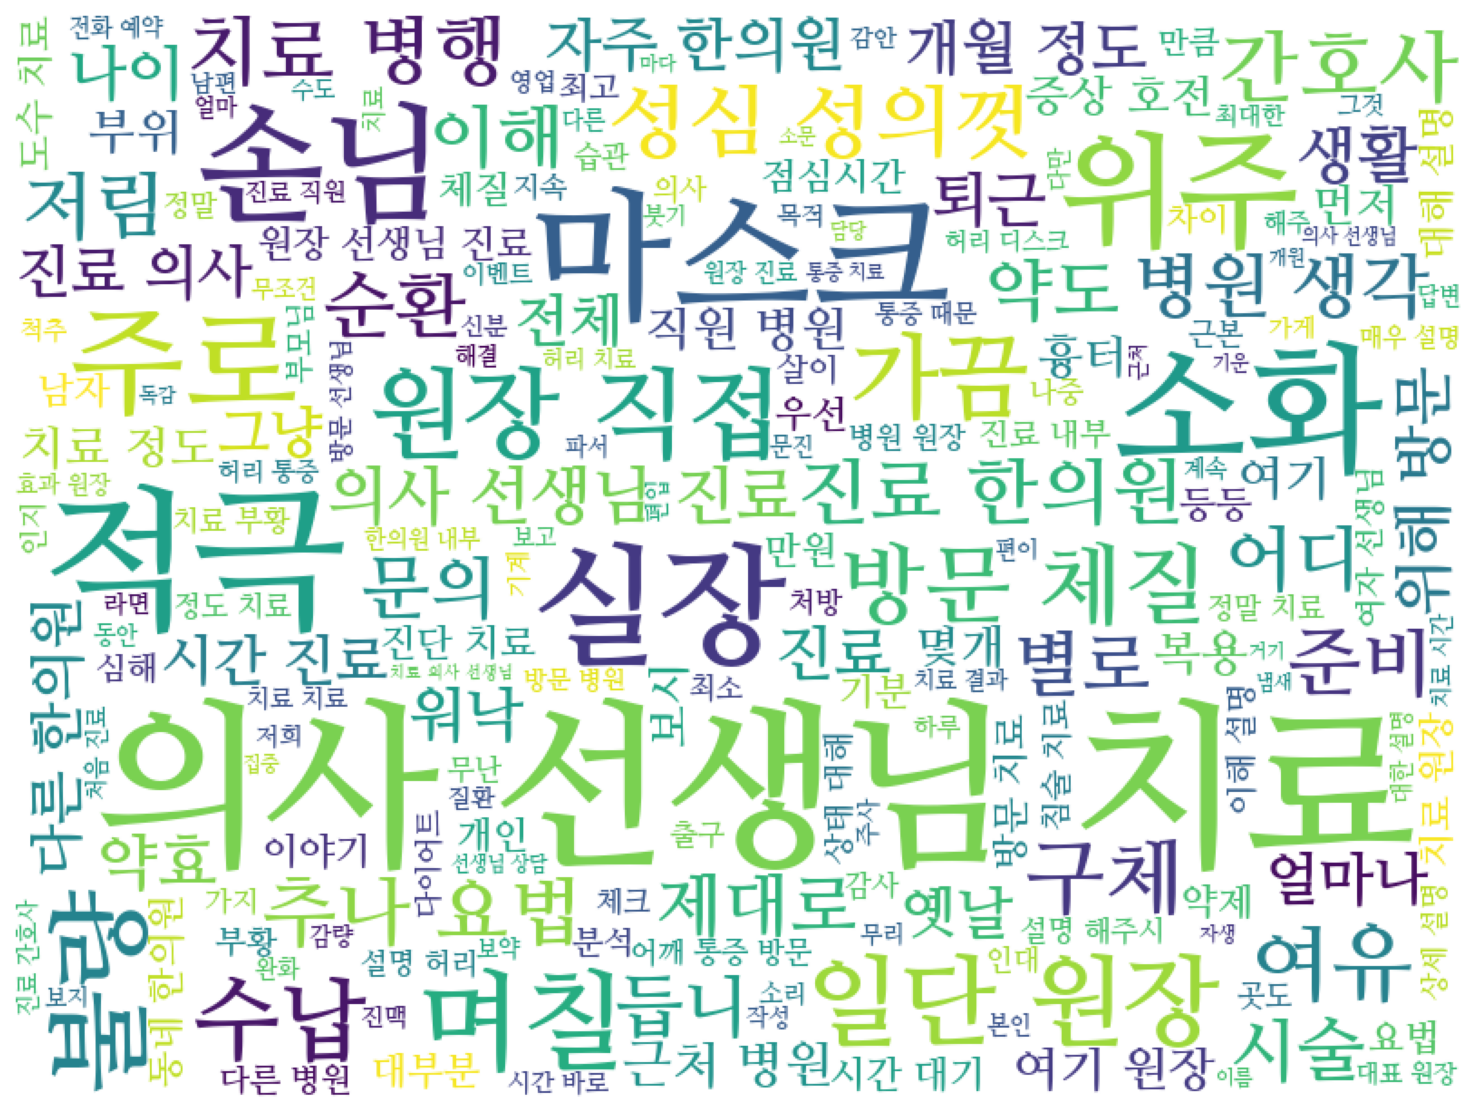

In [ ]:
#불용어
from wordcloud import STOPWORDS
from wordcloud import WordCloud


mystopwords = set(STOPWORDS)
mystopwords.add('치료')
mystopwords.update(['설명의사','한의원'])


#워드클라우드. #폰트 경로설정 가장 중요


wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
                      stopwords = mystopwords,
                      background_color='white',
                      width=800,
                      height=600)

# print(dict(words_v2))

cloud = wordcloud.generate_from_frequencies(dict(words_clean))
plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## **NETWORK**

In [26]:
for_network.head()

,hospital,stars,reviews,adress
9,진주경희한의원,10.0,"[허리, 갑자기, 집, 곳, 직장인, 저녁, 시간, 도, 야간, 진료, 원장, 이하...",경남
10,진주경희한의원,10.0,"[난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호...",경남
11,진주경희한의원,8.5,"[허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침...",경남
12,진주경희한의원,10.0,"[염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치...",경남
13,진주경희한의원,9.5,"[제, 지인, 추천, 병원, 제, 때, 다른, 병원, 달리, 대기, 시간, 별로, ...",경남


In [27]:
network_an = []

for i in for_network.reviews:
    if '느낌' in i:
        network_an.append(i)
    if '시설' in i :
        network_an.append(i)
    if '치료' in i :
        network_an.append(i)
    if '가격' in i:
        network_an.append(i)
    if '도움' in i:
        network_an.append(i)
    if '걱정' in i:
        network_an.append(i)
    if '체질' in i:
        network_an.append(i)
    if '진료' in i:
        network_an.append(i)
    if '하나' in i:
        network_an.append(i)
    if '설명' in i:
        network_an.append(i)
    if '디스크' in i:
        network_an.append(i)
 
network_an_df = pd.DataFrame({'reviews': network_an})
print(network_an_df.shape)
network_an_df.head()

(433, 1)


,reviews
0,"[허리, 갑자기, 집, 곳, 직장인, 저녁, 시간, 도, 야간, 진료, 원장, 이하..."
1,"[난생처음, 한의원, 방문, 집, 근처, 처음, 오픈, 한의원, 병원, 부도, 간호..."
2,"[허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침..."
3,"[허리, 병원, 중, 지인, 추천, 접수, 분, 원장, 것, 것, 주시, 진료, 침..."
4,"[염좌, 치료, 선생님, 의사, 선생님, 증상, 대해, 설명, 때, 긴장, 편, 치..."


In [28]:
from apyori import apriori
result = (list(apriori(network_an_df.reviews, min_support = 0.03)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['support'] >= 0.03)].sort_values(by='support', ascending = False)
df.head()

,items,support,ordered_statistics,length
146,(치료),0.616628,"[((), (치료), 0.6166281755196305, 1.0)]",1
135,(진료),0.494226,"[((), (진료), 0.4942263279445728, 1.0)]",1
148,(침),0.471132,"[((), (침), 0.47113163972286376, 1.0)]",1
75,(설명),0.418014,"[((), (설명), 0.418013856812933, 1.0)]",1
55,(방문),0.381062,"[((), (방문), 0.3810623556581986, 1.0)]",1


In [29]:
network_df = df.copy()
df_network = network_df[network_df['length']==2]
df_network.head()

,items,support,ordered_statistics,length
942,"(치료, 침)",0.332564,"[((), (치료, 침), 0.3325635103926097, 1.0), ((치료)...",2
909,"(치료, 진료)",0.290993,"[((), (치료, 진료), 0.2909930715935335, 1.0), ((진료...",2
701,"(설명, 치료)",0.247113,"[((), (설명, 치료), 0.2471131639722864, 1.0), ((설명...",2
805,"(치료, 원장)",0.240185,"[((), (원장, 치료), 0.24018475750577367, 1.0), ((원...",2
541,"(치료, 방문)",0.219400,"[((), (치료, 방문), 0.21939953810623555, 1.0), ((방...",2


In [30]:
index= []

for num, i in enumerate (df_network['items']):
    if '느낌' in i:
        index.append(num)
    if '시설' in i:
        index.append(num)
    if '치료' in i:
        index.append(num)
    if '가격' in i:
        index.append(num)
    if '도움' in i:
        index.append(num)
    if '걱정' in i:
        index.append(num)
    if '체질' in i:
        index.append(num)
    if '진료' in i:
        index.append(num)
    if '하나' in i:
        index.append(num)
    if '설명' in i:
        index.append(num)
    if '데스크' in i:
        index.append(num)

In [31]:
net_an = df_network.iloc[index]
net_an.head()

,items,support,ordered_statistics,length
942,"(치료, 침)",0.332564,"[((), (치료, 침), 0.3325635103926097, 1.0), ((치료)...",2
909,"(치료, 진료)",0.290993,"[((), (치료, 진료), 0.2909930715935335, 1.0), ((진료...",2
909,"(치료, 진료)",0.290993,"[((), (치료, 진료), 0.2909930715935335, 1.0), ((진료...",2
701,"(설명, 치료)",0.247113,"[((), (설명, 치료), 0.2471131639722864, 1.0), ((설명...",2
701,"(설명, 치료)",0.247113,"[((), (설명, 치료), 0.2471131639722864, 1.0), ((설명...",2


In [32]:
#그래프로 표현
import networkx as nx
G = nx.Graph()
ar = (net_an['items'])
G.add_edges_from(ar)

In [33]:
#페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 1000 * (nsize - min(nsize) / (max(nsize)-min(nsize)))

C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


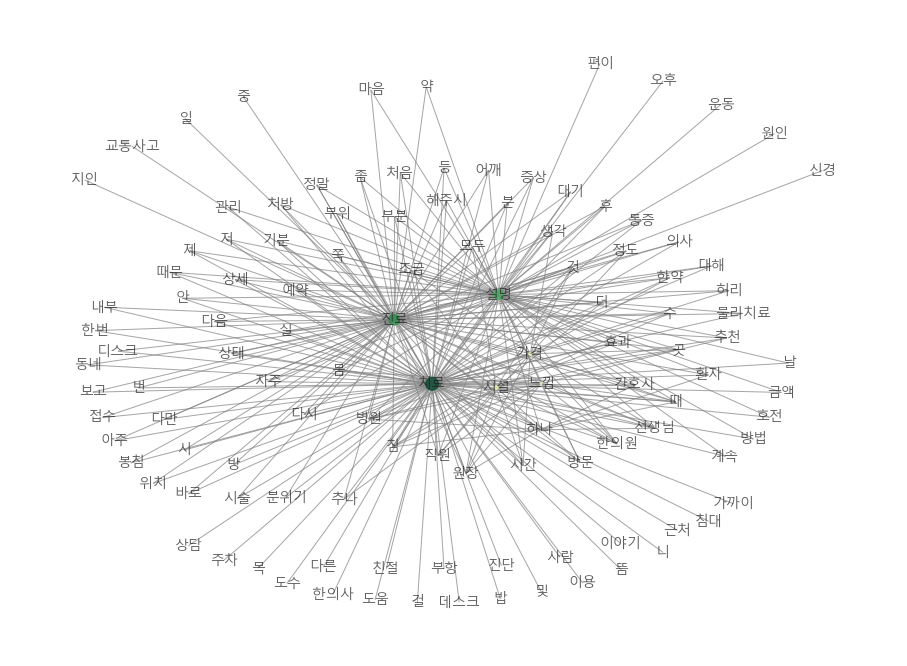

In [34]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

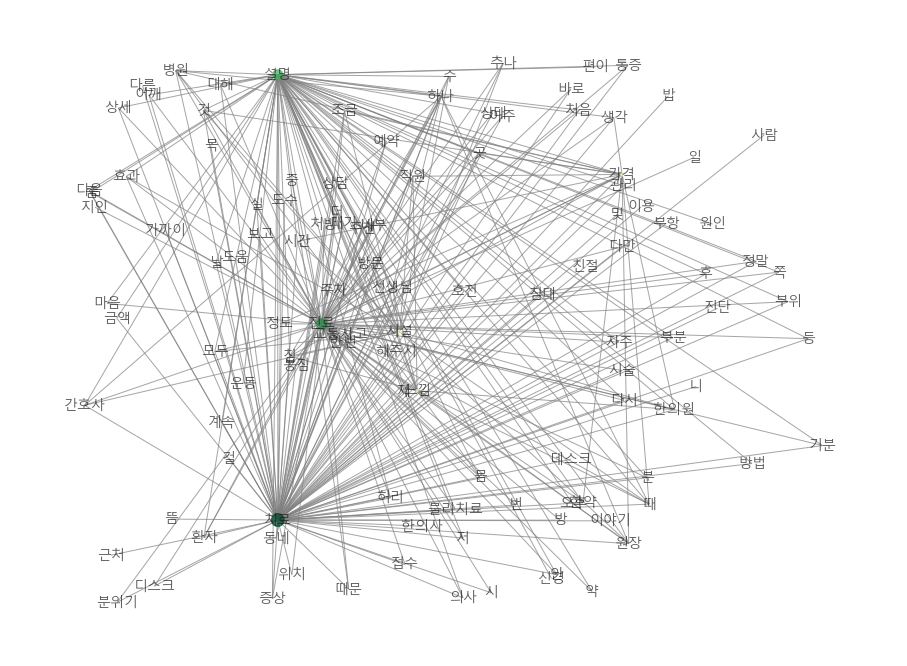

In [35]:
pos = nx.random_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

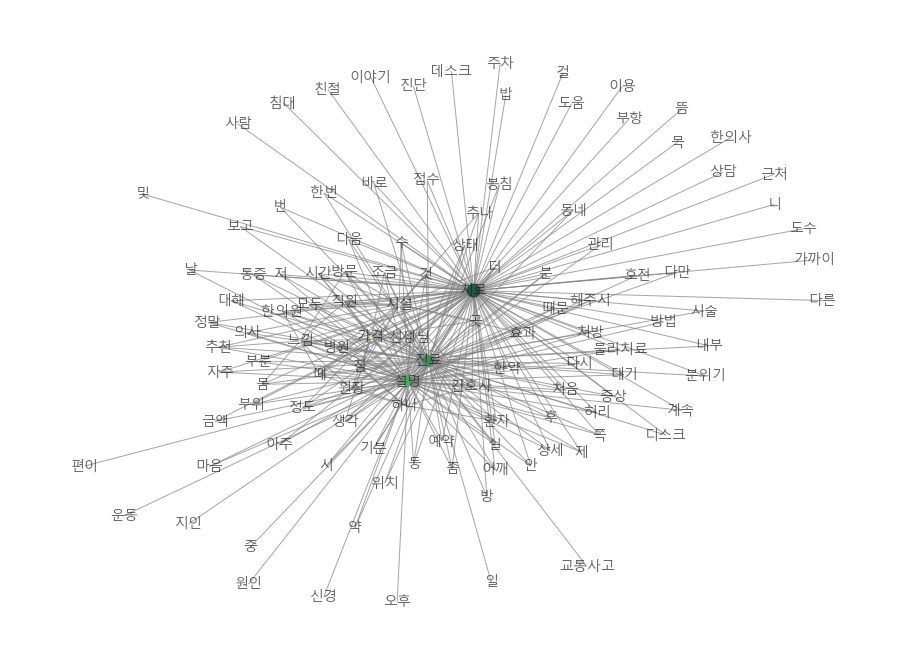

In [36]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)

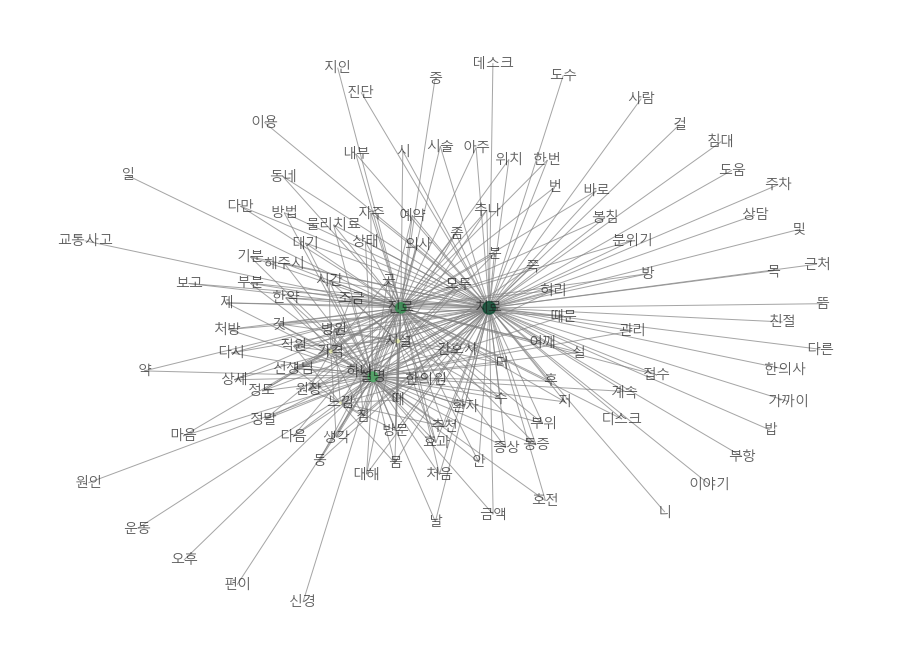

In [37]:
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 14,
                 pos = pos, node_color = list(pr.values()), node_size = nsize,
                 alpha=0.7, edge_color = '.5', cmap=plt.cm.YlGn)